# **Machine Learning Group Project**

### **Students number:** 
- Luís Ribeiro (nº20231536)
- Tiago Bellas (nº20231131)
- Fernando Tiago Reis (nº20231535)
- Renato Morais (nº20231135)

-----------------------------------------------------------------------

## Task 1

In [1]:
!pip install plotly
!pip install statsmodels
!pip install yellowbrick
!pip install openpyxl
!pip install nbformat==4.2.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as stats
import warnings
import plotly.graph_objects as go

from yellowbrick import ClassBalance
from matplotlib import style
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Disable all warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\tiago\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\tiago\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\tiago\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\tiago\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\tiago\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Loans data
loans = pd.read_csv('LoansData_assignment.csv')

# Loans dictionary
pd.set_option('display.max_colwidth', None)
loans_data_dic = pd.read_excel("LCDataDictionary.xlsx")

#### Data Pre-processing

First we are going to take a look at the dataset to check its shape and characteristics. After we are going to drop any columns that have either unique values for all rows, same value for all rows, or blanks on all rows. After we are going to clean the data so that our dataset is ready to be used in the model we chose.

In [3]:
loans.head()

,id,loan_amnt,int_rate,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status
0,35073899,25000,24.99,F,Professor of Music,10+ years,MORTGAGE,90000.0,Source Verified,debt_consolidation,...,3,83.3,75.0,0,0,54138,33174,21400,27038,Fully Paid
1,35023881,16750,15.59,D,President,1 year,MORTGAGE,40000.0,Source Verified,debt_consolidation,...,1,100.0,37.5,0,0,130661,12347,6900,4818,Current
2,32520014,3975,19.99,E,Assistant Manager,6 years,RENT,22000.0,Source Verified,debt_consolidation,...,2,100.0,100.0,0,0,40362,27293,4800,28862,Fully Paid
3,33501481,6000,10.49,B,Embroidery Dept Mngr,10+ years,MORTGAGE,31720.0,Source Verified,credit_card,...,0,95.5,100.0,0,0,40724,21295,8800,27124,Fully Paid
4,35093819,25000,15.99,D,NaN,NaN,MORTGAGE,66408.0,Verified,credit_card,...,0,100.0,100.0,0,0,313024,25447,11400,0,Fully Paid


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 94 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              70000 non-null  int64  
 1   loan_amnt                       70000 non-null  int64  
 2   int_rate                        70000 non-null  float64
 3   grade                           70000 non-null  object 
 4   emp_title                       66249 non-null  object 
 5   emp_length                      66256 non-null  object 
 6   home_ownership                  70000 non-null  object 
 7   annual_inc                      70000 non-null  float64
 8   verification_status             70000 non-null  object 
 9   purpose                         70000 non-null  object 
 10  addr_state                      70000 non-null  object 
 11  dti                             70000 non-null  float64
 12  delinq_2yrs                     

Now that we have examined the data structure, our next step involves detailing and refining the dataset. With a total of 94 columns, we will prioritize the removal of less significant ones to enhance the data's overall relevance and quality.

In [5]:
# Remove columns where all values are null,
loans.dropna(axis=1, how='all',inplace=True)

In [6]:
loans.shape

(70000, 77)

Below you will find that we are going to drop all columns that have at least 30% of data missing, as this is what is the norm in data science analysis when dealing with Missing Completely at Random 

https://atrium.ai/resources/learn-from-the-experts-the-consequences-of-missing-data/

In [7]:
# Calculate the percentage of missing values for each column
missing = round(100 * (loans.isnull().sum() / len(loans.id)), 2)

# Filter columns with missing values greater than zero
missing_values = missing.loc[missing > 0]

# Identify columns with missing values exceeding or equal to 30%
columns_with_missing_values = list(missing_values[missing_values >= 30].index)

# Drop columns with missing values exceeding or equal to 30%
loans = loans.drop(columns=columns_with_missing_values, axis=1)

In [8]:
loans.shape

(70000, 74)

Following the elimination of features with 30% or more missing data, our next step involves removing features characterized by either a singular unique value or a uniform unique value across all rows.

In [9]:
loans.nunique().sort_values()

application_type           1
policy_code                1
initial_list_status        2
num_tl_120dpd_2m           3
verification_status        3
                       ...  
total_rec_int          59957
tot_cur_bal            60688
total_pymnt_inv        62770
total_pymnt            63400
id                     70000
Length: 74, dtype: int64

In [10]:
loans.drop(["id", "policy_code", "application_type"], axis=1, inplace = True)

In [11]:
loans.shape

(70000, 71)

Next step involves identifying features with identical information and eliminate them

In [12]:
# Initialize an empty list to store the names of duplicate columns
duplicate_cols = []

# Iterate through the columns to check for duplicates
for i in range(0, len(loans.columns)):
    for j in range(i+1, len(loans.columns)):
        # Check if the values in column i are identical to those in column j
        result = (loans[loans.columns[i]] == loans[loans.columns[j]])

        # If no differences are found, implying identical values, append column j to the duplicate_cols list
        if result[result == False].count() == 0:
            duplicate_cols.append(loans.columns[j])

# Convert the duplicate_cols list to a set to remove duplicate entries
duplicate_cols = set(duplicate_cols)

print("Duplicate columns:", duplicate_cols)

Duplicate columns: set()


After checking if there were columns that were 100% equal ,we found that there were no columns that satisfy this test, so we decided to test if there were columns that were 95% equal.

In [13]:
duplicate_cols = set()
cols_being_duplicated = set()
threshold = 95

# Iterate through pairs of columns to check for duplicates.
for i in range(len(loans.columns)):
    col_a = loans.columns[i]

    if col_a not in duplicate_cols:
        for j in range(i + 1, len(loans.columns)):
            col_b = loans.columns[j]

            if col_b not in duplicate_cols and (loans[col_a] == loans[col_b]).mean() * 100 >= threshold:
                print(f"Column {col_b} is at least {threshold}% equal to column {col_a}")
                duplicate_cols.add(col_b)
                cols_being_duplicated.add(col_a)

print("\nDuplicate columns:", duplicate_cols)

Column num_sats is at least 95% equal to column open_acc
Column out_prncp_inv is at least 95% equal to column out_prncp
Column acc_now_delinq is at least 95% equal to column total_rec_late_fee
Column chargeoff_within_12_mths is at least 95% equal to column total_rec_late_fee
Column delinq_amnt is at least 95% equal to column total_rec_late_fee
Column num_tl_30dpd is at least 95% equal to column total_rec_late_fee
Column num_tl_120dpd_2m is at least 95% equal to column collections_12_mths_ex_med
Column tax_liens is at least 95% equal to column collections_12_mths_ex_med
Column num_rev_tl_bal_gt_0 is at least 95% equal to column num_actv_rev_tl

Duplicate columns: {'num_tl_30dpd', 'out_prncp_inv', 'tax_liens', 'num_tl_120dpd_2m', 'acc_now_delinq', 'chargeoff_within_12_mths', 'num_rev_tl_bal_gt_0', 'num_sats', 'delinq_amnt'}


Now we're going to check those columns being duplicated and duplicated columns, and if any is removable.

In [14]:
pd.set_option('display.max_colwidth', None)
loans_data_dic[ (loans_data_dic['LoanStatNew'].isin(duplicate_cols)) | (loans_data_dic['LoanStatNew'].isin(cols_being_duplicated)) ]

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
10,chargeoff_within_12_mths,Number of charge-offs within 12 months
12,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
14,delinq_amnt,The past-due amount owed for the accounts on which the borrower is now delinquent.
61,num_actv_rev_tl,Number of currently active revolving trades
67,num_rev_tl_bal_gt_0,Number of revolving trades with balance >0
68,num_sats,Number of satisfactory accounts
69,num_tl_120dpd_2m,Number of accounts currently 120 days past due (updated in past 2 months)
70,num_tl_30dpd,Number of accounts currently 30 days past due (updated in past 2 months)
73,open_acc,The number of open credit lines in the borrower's credit file.


Using the LCDataDictionary, and the above duplicated columns, we have made a decision about some features that we may remove without severly impacting our models performance. This decision was entirely empyrical, and not based on any metrics.

In [15]:
# List of columns to be drop
cols_to_drop = [
    'emp_title',
    'out_prncp_inv',
    'num_actv_rev_tl',
    'out_prncp_inv',
    'verification_status',
    'addr_state',
    'earliest_cr_line',
    'fico_range_low',
    'pub_rec',
    'initial_list_status',
    'out_prncp_inv',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'collection_recovery_fee',
    'collections_12_mths_ex_med',
    'num_tl_op_past_12m',
    'mths_since_recent_inq',
    'mo_sin_rcnt_tl',
    'total_pymnt' #model leakage
]

loans.drop(cols_to_drop, axis=1, inplace = True)

In [16]:
loans.shape

(70000, 52)

Now let's analyze all the lines that contain at least one null value, to decide whether to eliminate or replace

In [17]:
# Create a DataFrame 'rows_with_null_numbers' containing rows where at least one null value is present
rows_with_null_numbers = loans.loc[loans.isnull().any(axis=1)]

# Extract the names of columns containing null values in the 'rows_with_null_numbers' DataFrame
columns_with_null_numbers = rows_with_null_numbers.columns[rows_with_null_numbers.isnull().any()]

# Create a DataFrame 'data_with_null_numbers' containing only the columns with null values from 'rows_with_null_numbers'.
data_with_null_numbers = rows_with_null_numbers[columns_with_null_numbers]

data_with_null_numbers

,emp_length,revol_util,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mths_since_recent_bc,num_tl_120dpd_2m,percent_bc_gt_75
4,NaN,87.1,1475.0,87.1,138.0,30.0,0.0,100.0
17,4 years,59.9,1244.0,17.1,NaN,34.0,0.0,0.0
18,< 1 year,97.9,188.0,92.5,NaN,7.0,0.0,100.0
28,NaN,51.9,4618.0,51.9,107.0,17.0,0.0,0.0
35,NaN,35.1,0.0,104.9,134.0,36.0,0.0,100.0
...,...,...,...,...,...,...,...,...
69955,NaN,14.3,82026.0,15.8,154.0,17.0,0.0,10.0
69957,NaN,28.3,14727.0,35.1,109.0,4.0,0.0,0.0
69959,5 years,37.0,3688.0,50.0,143.0,12.0,NaN,25.0
69996,NaN,35.7,11792.0,46.4,30.0,2.0,0.0,50.0


In [18]:
# Representation of missing values
for column in loans.columns:
    if loans[column].isna().sum() != 0:
        missing = loans[column].isna().sum()
        portion = (missing / loans.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.1f}%'")

'emp_length': number of missing values '3744' ==> '5.3%'
'revol_util': number of missing values '40' ==> '0.1%'
'bc_open_to_buy': number of missing values '803' ==> '1.1%'
'bc_util': number of missing values '844' ==> '1.2%'
'mo_sin_old_il_acct': number of missing values '2139' ==> '3.1%'
'mths_since_recent_bc': number of missing values '747' ==> '1.1%'
'num_tl_120dpd_2m': number of missing values '1686' ==> '2.4%'
'percent_bc_gt_75': number of missing values '829' ==> '1.2%'


We consider introducing missing values by replacing them with the average of each column. However, the "emp_length" column is a categorical column, so to replace it we should consider the average of each category for a more accurate representation.

Given the complexities involved, we chose a simpler approach and resolved to eliminate rows containing at least one null value.

In [19]:
loans.dropna(inplace=True)

loans.shape

(62058, 52)

#### Converting categorical variables into numerical ones

Transforming nominal categorical variables (objects) into ordinal categorical variables

In [20]:
# Identify and store the names of categorical columns, excluding the last column
categorical_columns = loans.select_dtypes(include = 'object').columns[:-1]
categorical_columns

Index(['grade', 'emp_length', 'home_ownership', 'purpose'], dtype='object')

In [21]:
LE = LabelEncoder()

# Iterate through each column in the 'categorical_columns' and encode categorical values
for col in categorical_columns:
    loans[col] = LE.fit_transform(loans[col])

loans.dtypes

loan_amnt                       int64
int_rate                      float64
grade                           int32
emp_length                      int32
home_ownership                  int32
annual_inc                    float64
purpose                         int32
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
out_prncp                     float64
recoveries                    float64
acc_now_delinq                  int64
tot_coll_amt                    int64
tot_cur_bal                     int64
total_rev_hi_lim                int64
acc_open_past_24mths            int64
avg_cur_bal                     int64
bc_open_to_buy                float64
bc_util                       float64
chargeoff_within_12_mths        int64
delinq_amnt                     int64
mo_sin_old_i

Updating the 'loan_status' column in the 'loans' DataFrame to binary values.
Assigning 1 if the status is 'Charged Off' or 'Default', and 0 otherwise.

In [22]:
loans['loan_status'] = loans['loan_status'].apply(lambda s: 1 if s == 'Charged Off' or s == 'Default' else 0)

loans.dtypes

loan_amnt                       int64
int_rate                      float64
grade                           int32
emp_length                      int32
home_ownership                  int32
annual_inc                    float64
purpose                         int32
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
out_prncp                     float64
recoveries                    float64
acc_now_delinq                  int64
tot_coll_amt                    int64
tot_cur_bal                     int64
total_rev_hi_lim                int64
acc_open_past_24mths            int64
avg_cur_bal                     int64
bc_open_to_buy                float64
bc_util                       float64
chargeoff_within_12_mths        int64
delinq_amnt                     int64
mo_sin_old_i

In [23]:
loans.head()

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status
0,25000,24.99,5,1,1,90000.0,2,12.13,1,1,...,0,83.3,75.0,0,0,54138,33174,21400,27038,0
1,16750,15.59,3,0,1,40000.0,2,16.50,0,1,...,0,100.0,37.5,0,0,130661,12347,6900,4818,0
2,3975,19.99,4,6,3,22000.0,2,37.32,0,0,...,0,100.0,100.0,0,0,40362,27293,4800,28862,0
3,6000,10.49,1,1,1,31720.0,1,30.65,1,0,...,0,95.5,100.0,0,0,40724,21295,8800,27124,0
5,20000,7.49,0,2,1,315000.0,2,19.40,0,0,...,0,96.4,66.7,0,0,559685,145825,19100,115784,0


In [24]:
loans.shape

(62058, 52)

Let's separate the predictor variables and the target variable, X being the predictors and y being our target.

In [25]:
predictors = loans.iloc[:, :-1].values
predictors

array([[2.5000e+04, 2.4990e+01, 5.0000e+00, ..., 3.3174e+04, 2.1400e+04,
        2.7038e+04],
       [1.6750e+04, 1.5590e+01, 3.0000e+00, ..., 1.2347e+04, 6.9000e+03,
        4.8180e+03],
       [3.9750e+03, 1.9990e+01, 4.0000e+00, ..., 2.7293e+04, 4.8000e+03,
        2.8862e+04],
       ...,
       [5.5000e+03, 1.0990e+01, 1.0000e+00, ..., 9.9689e+04, 8.0000e+02,
        9.8681e+04],
       [2.5000e+04, 1.0150e+01, 1.0000e+00, ..., 3.5398e+04, 1.6090e+05,
        2.7950e+04],
       [7.0000e+03, 1.0150e+01, 1.0000e+00, ..., 5.8800e+02, 3.6000e+03,
        0.0000e+00]])

In [26]:
predictors.shape

(62058, 51)

In [27]:
target = loans.iloc[:, -1].values
target

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
target.shape

(62058,)

### Data exploratory analysis

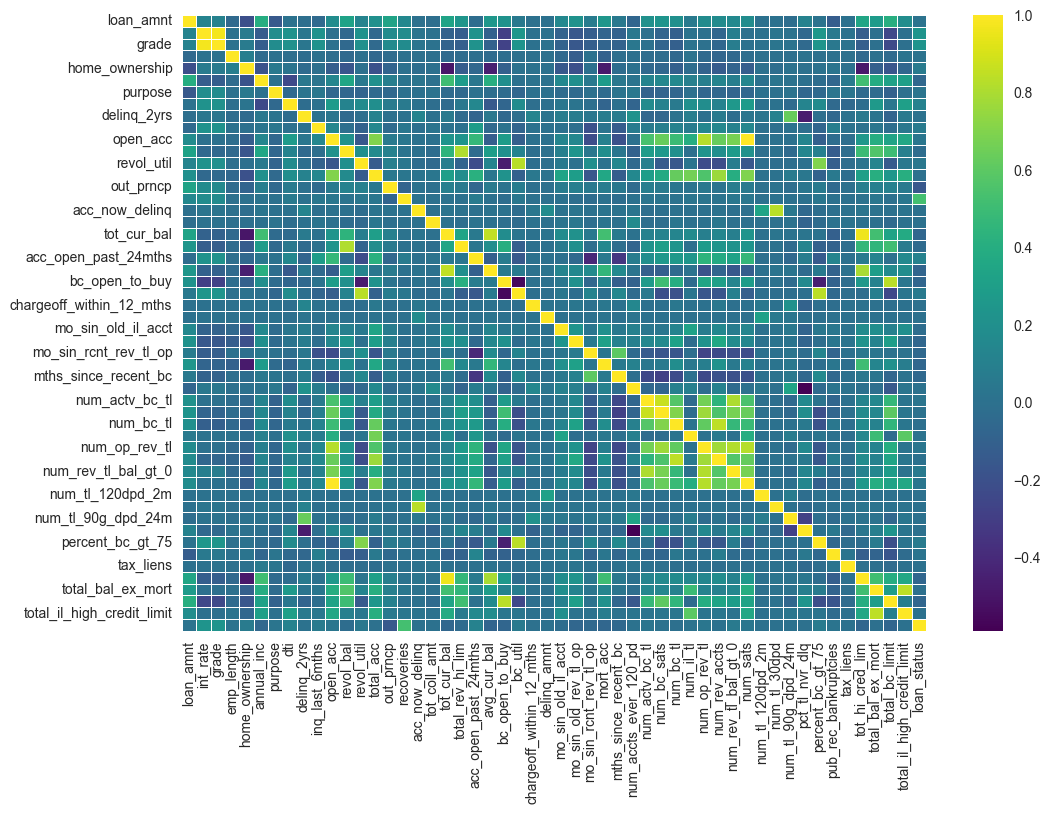

In [29]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8));
sns.heatmap(loans.corr(), annot=False, cmap='viridis', linewidths=0.4);

It is not easy to visualize the correlations between the variables through the heatmap presented above, also some variables are missing, so we are going to calculate by presenting the correlation between the target variable and the predictor variable

In [30]:
# Calculate the absolute correlation coefficients between the target variable and the predictor variables, and sort them in descending order
corr_loan_status = abs(loans.corr()['loan_status']).sort_values(ascending=False)
corr_loan_status

loan_status                   1.000000
recoveries                    0.526827
int_rate                      0.234548
grade                         0.231419
out_prncp                     0.160536
acc_open_past_24mths          0.107699
dti                           0.106353
avg_cur_bal                   0.075264
bc_open_to_buy                0.072708
total_bc_limit                0.071906
tot_hi_cred_lim               0.071669
inq_last_6mths                0.067074
tot_cur_bal                   0.066683
mo_sin_old_rev_tl_op          0.065575
percent_bc_gt_75              0.064869
mort_acc                      0.063399
home_ownership                0.063249
annual_inc                    0.060335
bc_util                       0.057822
num_rev_tl_bal_gt_0           0.057201
mo_sin_rcnt_rev_tl_op         0.053583
mths_since_recent_bc          0.051110
revol_util                    0.045296
total_rev_hi_lim              0.037690
num_sats                      0.032149
open_acc                 

In [31]:
loans['loan_amnt'].value_counts()

loan_amnt
10000    4285
12000    3523
20000    3508
15000    3386
35000    2811
         ... 
2675        1
31925       1
31800       1
25650       1
28275       1
Name: count, Length: 1215, dtype: int64

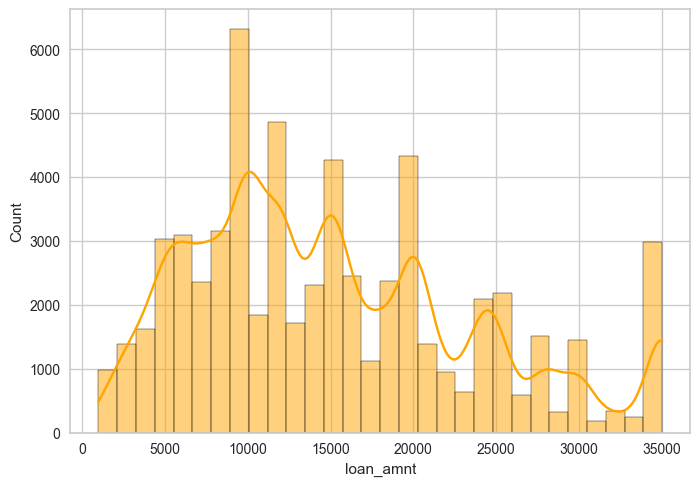

In [32]:
sns.histplot(loans, x='loan_amnt', bins=30, color="orange", kde=True, stat="count");

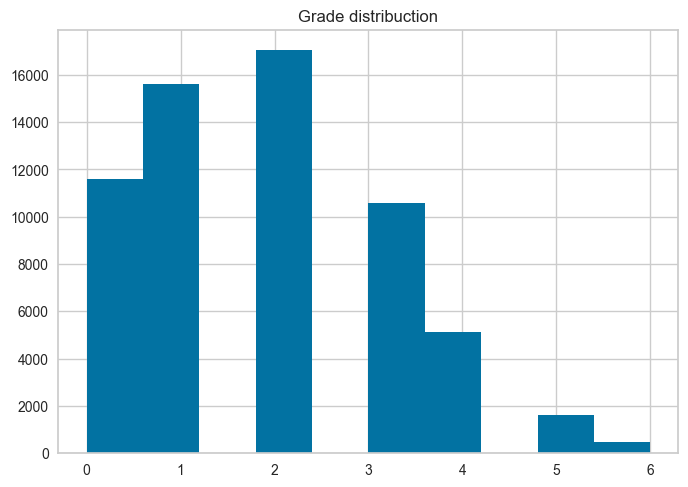

In [33]:
plt.figure();
plt.hist(loans["grade"], bins=10);
plt.title('Grade distribuction');

Now, let's explore our target feature

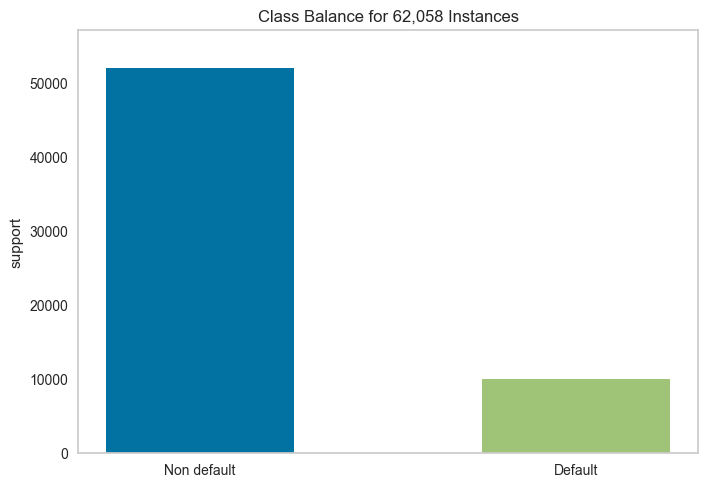

In [34]:
loan_status_graph = ClassBalance(labels=['Non default', 'Default'])
loan_status_graph.fit(loans['loan_status'])
loan_status_graph.ax.grid(False)
loan_status_graph.show();

As we can see from the graph our data is heavily skewed in favour of Non Default, so our model is expected to predict Non Defaults at a much better precision rate comparing to how its going to predict Defaults.

#### Scaling using Label Encoder

Standardization (use the mean and the standard deviation as a reference), we are doing this so that we can use the PCA approach to handle our high number of variables.

In [35]:
loans.describe()

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status
count,62058.000000,62058.000000,62058.000000,62058.000000,62058.000000,6.205800e+04,62058.000000,62058.000000,62058.000000,62058.000000,...,62058.000000,62058.000000,62058.000000,62058.000000,62058.000000,6.205800e+04,6.205800e+04,62058.000000,62058.000000,62058.000000
mean,15196.084308,13.239017,1.819443,3.647974,1.896919,7.624585e+04,2.308550,19.059708,0.353524,0.586806,...,0.091414,94.385539,51.077020,0.120822,0.058026,1.775182e+05,5.257301e+04,21337.406346,43337.978440,0.161623
std,8500.234992,4.395626,1.350805,3.204308,0.944669,5.457568e+04,1.789437,8.458227,0.920280,0.860408,...,0.479302,8.243949,35.223831,0.369138,0.390602,1.831417e+05,4.874739e+04,20879.186403,42556.863114,0.368108
min,1000.000000,6.000000,0.000000,0.000000,0.000000,6.400000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,16.700000,0.000000,0.000000,0.000000,2.500000e+03,0.000000e+00,100.000000,0.000000,0.000000
25%,8775.000000,10.150000,1.000000,1.000000,1.000000,4.700000e+04,2.000000,12.690000,0.000000,0.000000,...,0.000000,91.700000,20.000000,0.000000,0.000000,5.236325e+04,2.360100e+04,7600.000000,16500.000000,0.000000
50%,14000.000000,12.990000,2.000000,2.000000,1.000000,6.500000e+04,2.000000,18.510000,0.000000,0.000000,...,0.000000,97.600000,50.000000,0.000000,0.000000,1.174820e+05,4.015250e+04,14900.000000,33006.000000,0.000000
75%,20000.000000,15.610000,3.000000,6.000000,3.000000,9.000000e+04,2.000000,24.950000,0.000000,1.000000,...,0.000000,100.000000,80.000000,0.000000,0.000000,2.554738e+05,6.547650e+04,28000.000000,57585.000000,0.000000
max,35000.000000,26.060000,6.000000,10.000000,3.000000,4.900000e+06,12.000000,39.990000,22.000000,6.000000,...,22.000000,100.000000,100.000000,12.000000,18.000000,9.999999e+06,2.688920e+06,456200.000000,876963.000000,1.000000


In [36]:
loans_scaled = StandardScaler().fit_transform(predictors)
loans_scaled

array([[ 1.15337925e+00,  2.67335706e+00,  2.35458244e+00, ...,
        -3.97952987e-01,  2.99792135e-03, -3.83019531e-01],
       [ 1.82810030e-01,  5.34850281e-01,  8.73972273e-01, ...,
        -8.25199820e-01, -6.91479179e-01, -9.05148688e-01],
       [-1.32010171e+00,  1.53585346e+00,  1.61427736e+00, ...,
        -5.18596317e-01, -7.92058621e-01, -3.40158884e-01],
       ...,
       [-1.14069346e+00, -5.11653038e-01, -6.06637894e-01, ...,
         9.66541328e-01, -9.83638511e-01,  1.30045928e+00],
       [ 1.15337925e+00, -7.02753644e-01, -6.06637894e-01, ...,
        -3.52329664e-01,  6.68434658e+00, -3.61589208e-01],
       [-9.64226325e-01, -7.02753644e-01, -6.06637894e-01, ...,
        -1.06642494e+00, -8.49532588e-01, -1.01836283e+00]])

In [37]:
# converting loans_scaled into a dataframe to be able to make "describe"
loans_scaled_df = pd.DataFrame(loans_scaled)
loans_scaled_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,...,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04
mean,8.335349e-17,2.967751e-16,-2.015139e-17,1.831945e-18,1.305261e-17,-4.373768e-17,-9.480315e-17,9.800905e-17,2.404428e-17,1.447236e-16,...,-3.652440e-17,1.923542e-17,4.524904e-16,1.080848e-16,-1.591502e-17,-2.667770e-17,-4.259272e-17,4.545513e-17,7.052988e-17,-5.295466e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.670095e+00,-1.646882e+00,-1.346943e+00,-1.138469e+00,-2.008042e+00,-1.279808e+00,-1.290109e+00,-2.253411e+00,-3.841515e-01,-6.820147e-01,...,-6.212948e-02,-1.907255e-01,-9.423416e+00,-1.450082e+00,-3.273122e-01,-1.485573e-01,-9.556513e-01,-1.078487e+00,-1.017165e+00,-1.018363e+00
25%,-7.554069e-01,-7.027536e-01,-6.066379e-01,-8.263863e-01,-9.494613e-01,-5.358813e-01,-1.724299e-01,-7.530844e-01,-3.841515e-01,-6.820147e-01,...,-6.212948e-02,-1.907255e-01,-3.257615e-01,-8.822797e-01,-3.273122e-01,-1.485573e-01,-6.833832e-01,-5.943343e-01,-6.579527e-01,-6.306432e-01
50%,-1.407130e-01,-5.665159e-02,1.336672e-01,-5.143039e-01,-9.494613e-01,-2.060614e-01,-1.724299e-01,-6.499143e-02,-3.841515e-01,-6.820147e-01,...,-6.212948e-02,-1.907255e-01,3.899207e-01,-3.057670e-02,-3.273122e-01,-1.485573e-01,-3.278155e-01,-2.547955e-01,-3.083194e-01,-2.427825e-01
75%,5.651555e-01,5.394003e-01,8.739723e-01,7.340258e-01,1.167700e+00,2.520217e-01,-1.724299e-01,6.964035e-01,-3.841515e-01,4.802345e-01,...,-6.212948e-02,-1.907255e-01,6.810457e-01,8.211263e-01,-3.273122e-01,-1.485573e-01,4.256604e-01,2.647032e-01,3.191047e-01,3.347788e-01
max,2.329827e+00,2.916783e+00,3.094888e+00,1.982355e+00,1.167700e+00,8.838723e+01,5.415963e+00,2.474568e+00,2.352181e+01,6.291480e+00,...,5.424253e+01,4.570968e+01,6.810457e-01,1.388928e+00,3.218110e+01,4.593449e+01,5.363366e+01,5.408224e+01,2.082773e+01,1.958866e+01


In [38]:
# converting loans_scaled into a dataframe to be able to make "describe"
loans_scaled_df = pd.DataFrame(loans_scaled)
loans_scaled_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,...,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04,6.205800e+04
mean,8.335349e-17,2.967751e-16,-2.015139e-17,1.831945e-18,1.305261e-17,-4.373768e-17,-9.480315e-17,9.800905e-17,2.404428e-17,1.447236e-16,...,-3.652440e-17,1.923542e-17,4.524904e-16,1.080848e-16,-1.591502e-17,-2.667770e-17,-4.259272e-17,4.545513e-17,7.052988e-17,-5.295466e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.670095e+00,-1.646882e+00,-1.346943e+00,-1.138469e+00,-2.008042e+00,-1.279808e+00,-1.290109e+00,-2.253411e+00,-3.841515e-01,-6.820147e-01,...,-6.212948e-02,-1.907255e-01,-9.423416e+00,-1.450082e+00,-3.273122e-01,-1.485573e-01,-9.556513e-01,-1.078487e+00,-1.017165e+00,-1.018363e+00
25%,-7.554069e-01,-7.027536e-01,-6.066379e-01,-8.263863e-01,-9.494613e-01,-5.358813e-01,-1.724299e-01,-7.530844e-01,-3.841515e-01,-6.820147e-01,...,-6.212948e-02,-1.907255e-01,-3.257615e-01,-8.822797e-01,-3.273122e-01,-1.485573e-01,-6.833832e-01,-5.943343e-01,-6.579527e-01,-6.306432e-01
50%,-1.407130e-01,-5.665159e-02,1.336672e-01,-5.143039e-01,-9.494613e-01,-2.060614e-01,-1.724299e-01,-6.499143e-02,-3.841515e-01,-6.820147e-01,...,-6.212948e-02,-1.907255e-01,3.899207e-01,-3.057670e-02,-3.273122e-01,-1.485573e-01,-3.278155e-01,-2.547955e-01,-3.083194e-01,-2.427825e-01
75%,5.651555e-01,5.394003e-01,8.739723e-01,7.340258e-01,1.167700e+00,2.520217e-01,-1.724299e-01,6.964035e-01,-3.841515e-01,4.802345e-01,...,-6.212948e-02,-1.907255e-01,6.810457e-01,8.211263e-01,-3.273122e-01,-1.485573e-01,4.256604e-01,2.647032e-01,3.191047e-01,3.347788e-01
max,2.329827e+00,2.916783e+00,3.094888e+00,1.982355e+00,1.167700e+00,8.838723e+01,5.415963e+00,2.474568e+00,2.352181e+01,6.291480e+00,...,5.424253e+01,4.570968e+01,6.810457e-01,1.388928e+00,3.218110e+01,4.593449e+01,5.363366e+01,5.408224e+01,2.082773e+01,1.958866e+01


In [39]:
loans_scaled_df.shape

(62058, 51)

Now we are going to improve our dataset by eliminating the predictors feature with correlation less then 1%, for further uses

In [40]:
corr_loan_status

loan_status                   1.000000
recoveries                    0.526827
int_rate                      0.234548
grade                         0.231419
out_prncp                     0.160536
acc_open_past_24mths          0.107699
dti                           0.106353
avg_cur_bal                   0.075264
bc_open_to_buy                0.072708
total_bc_limit                0.071906
tot_hi_cred_lim               0.071669
inq_last_6mths                0.067074
tot_cur_bal                   0.066683
mo_sin_old_rev_tl_op          0.065575
percent_bc_gt_75              0.064869
mort_acc                      0.063399
home_ownership                0.063249
annual_inc                    0.060335
bc_util                       0.057822
num_rev_tl_bal_gt_0           0.057201
mo_sin_rcnt_rev_tl_op         0.053583
mths_since_recent_bc          0.051110
revol_util                    0.045296
total_rev_hi_lim              0.037690
num_sats                      0.032149
open_acc                 

In [41]:
loans_no_low_correlation = pd.DataFrame.copy(loans)

In [42]:
cols_to_drop = [
    'total_acc',
    'num_bc_tl',
    'delinq_2yrs',
    'num_bc_sats',
    'total_bal_ex_mort',
    'tax_liens',
    'delinq_amnt',
    'pct_tl_nvr_dlq',
    'num_tl_90g_dpd_24m',
    'tot_coll_amt',
    'acc_now_delinq',
    'total_il_high_credit_limit',
    'num_rev_accts',
    'num_tl_120dpd_2m',
    'num_tl_30dpd',
    'chargeoff_within_12_mths'
]

loans_no_low_correlation.drop(cols_to_drop, axis=1, inplace = True)

In [43]:
loans_no_low_correlation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62058 entries, 0 to 69998
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              62058 non-null  int64  
 1   int_rate               62058 non-null  float64
 2   grade                  62058 non-null  int32  
 3   emp_length             62058 non-null  int32  
 4   home_ownership         62058 non-null  int32  
 5   annual_inc             62058 non-null  float64
 6   purpose                62058 non-null  int32  
 7   dti                    62058 non-null  float64
 8   inq_last_6mths         62058 non-null  int64  
 9   open_acc               62058 non-null  int64  
 10  revol_bal              62058 non-null  int64  
 11  revol_util             62058 non-null  float64
 12  out_prncp              62058 non-null  float64
 13  recoveries             62058 non-null  float64
 14  tot_cur_bal            62058 non-null  int64  
 15  total_r

Let's separate the predictor variables and the target variable, X being the predictors and y being our target.

In [44]:
predictors_no_low_correlation = loans_no_low_correlation.iloc[:, :-1].values
predictors_no_low_correlation.shape

(62058, 35)

In [45]:
target_no_low_correlation = loans.iloc[:, -1].values
target_no_low_correlation.shape

(62058,)

In [46]:
loans_no_low_correlation_scaled = StandardScaler().set_output(transform="pandas").fit_transform(predictors_no_low_correlation)

#### Train and test split

In [47]:
# Using loans_scaled
X_train, X_test, y_train, y_test = train_test_split(
    predictors_no_low_correlation, 
    target_no_low_correlation, 
    test_size = 0.3, 
    random_state = 0
)

In [48]:
# Display the shapes of the training and testing sets for features and target variable
print(f"Shape of x_train (features for training): {X_train.shape}")
print(f"Shape of x_test (features for testing): {X_test.shape}")
print(f"Shape of y_train (target variable for training): {y_train.shape}")
print(f"Shape of y_test (target variable for testing): {y_test.shape}")

Shape of x_train (features for training): (43440, 35)
Shape of x_test (features for testing): (18618, 35)
Shape of y_train (target variable for training): (43440,)
Shape of y_test (target variable for testing): (18618,)


### Models building

In [49]:
def plot_confusion_matrix(cf_matrix):
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

#### K-Nearest Neighbors

In [50]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Algorithm valuation

In [51]:
predictions_knn = knn_model.predict(X_test)
predictions_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
y_test

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [53]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions_knn) * 100.0))

Accuracy: 82.00%


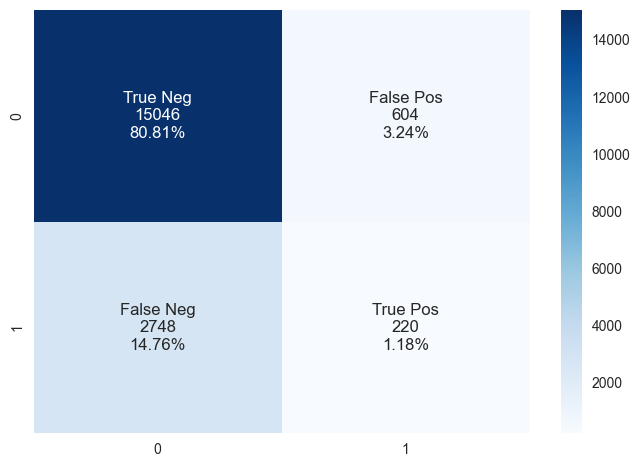

In [54]:
plot_confusion_matrix(confusion_matrix(y_test, predictions_knn))

In [55]:
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     15650
           1       0.27      0.07      0.12      2968

    accuracy                           0.82     18618
   macro avg       0.56      0.52      0.51     18618
weighted avg       0.75      0.82      0.77     18618



Cross validation

In [56]:
# Spliting the data into folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [57]:
# Creating the model cross checking
model = KNeighborsClassifier(n_neighbors=5)
resultado = cross_val_score(model, loans_no_low_correlation_scaled, target, cv = kfold)

# Using the average and the standard deviation
print("Average accuracy: %.2f%%" % (resultado.mean() * 100.0))

Average accuracy: 88.20%


##### Model validation

In [58]:
# first we need the class probability estimates
probs = knn_model.predict_proba(X_test)
probs

array([[1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2]])

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, RocCurveDisplay

# then we can use the roc_curve function
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])

In [60]:
print("Model validation: %.2f%%" % (roc_auc_score(y_test, probs[:,1]) * 100.0))

Model validation: 57.54%


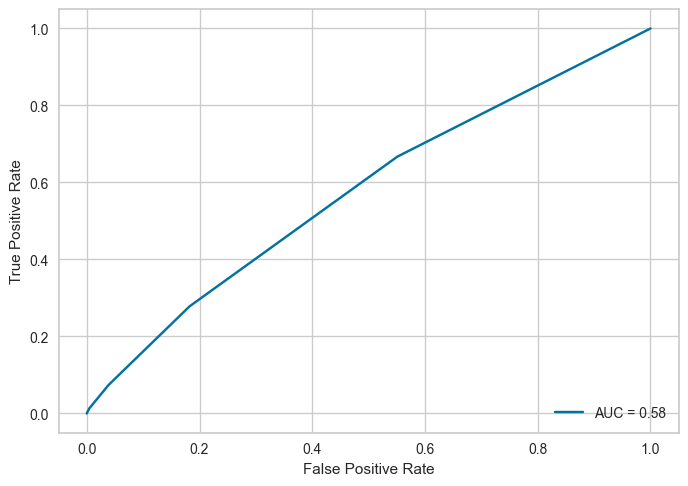

In [61]:
auc = auc(fpr, tpr)

RocCurveDisplay(fpr=fpr, tpr= tpr, roc_auc=auc).plot();

As referred above we are going to test the models without the low correlation variables to see if we get better results

In [62]:
X_train_no_low_correlation, X_test_no_low_correlation, y_train_no_low_correlation, y_test_no_low_correlation = train_test_split(loans_no_low_correlation_scaled, target, test_size = 0.3, random_state = 0)

Let's build another KNN model

In [63]:
knn_model_no_low_correlation = KNeighborsClassifier(n_neighbors=5)
knn_model_no_low_correlation.fit(X_train_no_low_correlation, y_train_no_low_correlation)

KNeighborsClassifier()

Algorithm valuation

In [64]:
predictions_no_low_correlation_knn = knn_model_no_low_correlation.predict(X_test_no_low_correlation)
predictions_no_low_correlation_knn

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test_no_low_correlation, predictions_no_low_correlation_knn) * 100.0))

Accuracy: 88.23%


Cross validation

In [66]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [67]:
# Creating the model cross checking
model_no_low_correlation = KNeighborsClassifier(n_neighbors=5)
results_no_low_correlation = cross_val_score(model_no_low_correlation, loans_no_low_correlation_scaled, target, cv = kfold)

# Using the average and the standard deviation
print("Average accuracy: %.2f%%" % (results_no_low_correlation.mean() * 100.0))

Average accuracy: 88.20%


Model validation

In [68]:
probs_no_low_correlation = knn_model_no_low_correlation.predict_proba(X_test_no_low_correlation)
probs_no_low_correlation

array([[1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       ...,
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2]])

In [69]:
# then we can use the roc_curve function
fpr, tpr, threshold = roc_curve(y_test_no_low_correlation, probs_no_low_correlation[:,1])

In [70]:
print("Model validation: %.2f%%" % (roc_auc_score(y_test_no_low_correlation, probs_no_low_correlation[:,1]) * 100.0))

Model validation: 74.93%


#### Logistic regression

In [71]:
# Starting the model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

Algorithm valuation

In [72]:
logistic_model.intercept_

array([-1.24551677e-05])

In [73]:
logistic_model.coef_

array([[ 2.14312291e-05, -4.31195862e-05,  1.44926225e-05,
        -4.99533776e-05, -2.95785819e-05, -2.07627366e-05,
        -2.09779834e-05, -1.72045740e-04,  2.55784891e-06,
        -9.59106728e-05,  4.79599624e-05, -6.46582875e-04,
        -5.58190008e-02,  6.35542458e-02,  6.84302941e-06,
        -4.58273733e-05, -4.48239385e-06, -6.81538097e-05,
         2.85528641e-05, -7.68350469e-04, -1.30836318e-03,
        -1.93904907e-03, -2.47337969e-04, -4.99323032e-06,
        -4.63842890e-04, -5.87072153e-06, -2.08718630e-05,
        -1.01442830e-04, -4.84213399e-05, -3.04810778e-05,
        -9.55551279e-05, -5.13701178e-04, -1.59358073e-06,
        -1.35080890e-06, -7.84873534e-06]])

In [74]:
logistic_predictions = logistic_model.predict(X_test)
logistic_predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
print("Acuracy: %.2f%%" % (accuracy_score(y_test, logistic_predictions) * 100.0))

Acuracy: 94.20%


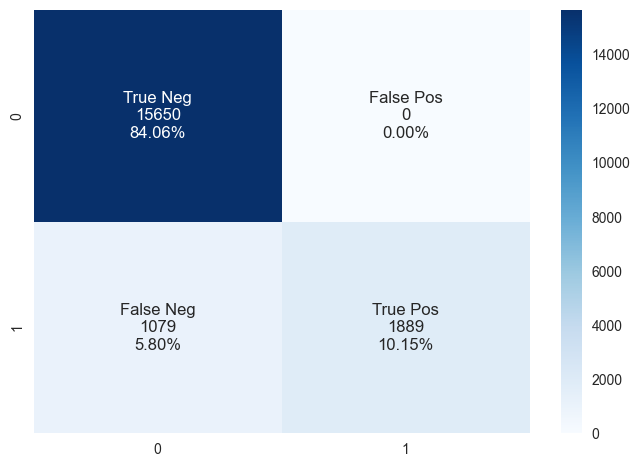

In [76]:
plot_confusion_matrix(confusion_matrix(y_test, logistic_predictions))

In [77]:
print(classification_report(y_test, logistic_predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15650
           1       1.00      0.64      0.78      2968

    accuracy                           0.94     18618
   macro avg       0.97      0.82      0.87     18618
weighted avg       0.95      0.94      0.94     18618



#### Cross checking

In [78]:
# Spliting the data into folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [79]:
# Criando o modelo
model = LogisticRegression(random_state=1, max_iter=600, penalty="l2",
                               tol=0.0001, C=1,solver="lbfgs")
result = cross_val_score(model, loans_no_low_correlation_scaled, target, cv = kfold)

# Usamos a média e o desvio padrão
print("Average accuracy: %.2f%%" % (result.mean() * 100.0))

Average accuracy: 94.02%


### Gaussian Naive Bayes

Algorithm training

In [80]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

GaussianNB()

Algorithm valuation

In [81]:
y_test

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [82]:
naive_predictions = naive_model.predict(X_test)
naive_predictions

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [83]:
print("Testing accuracy: %.2f%%" % (accuracy_score(y_test, naive_predictions) * 100.0))

Testing accuracy: 86.45%


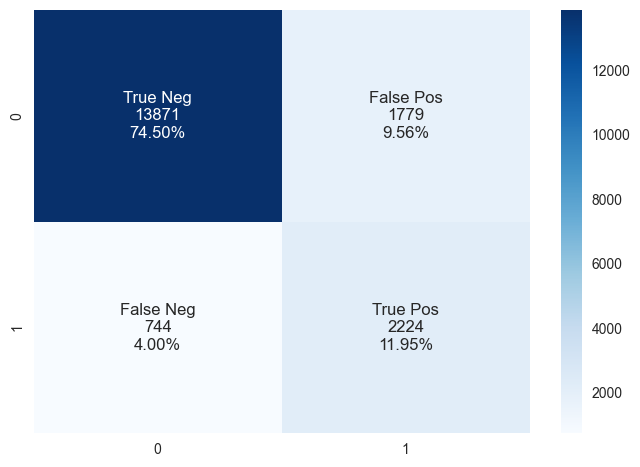

In [84]:
plot_confusion_matrix(confusion_matrix(y_test, naive_predictions))

In [85]:
print(classification_report(y_test, naive_predictions))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     15650
           1       0.56      0.75      0.64      2968

    accuracy                           0.86     18618
   macro avg       0.75      0.82      0.78     18618
weighted avg       0.89      0.86      0.87     18618



#### Part A

This is, in our opinion, our "best" classification model as it is the one that has the highest accuracy while having realistic results. The limitations on this model are the fact that it assumes all our variables are independent which we know they aren't and the fact that our data is heavily skewed towards non "charged off", meaning our model will not be as good as it can be predicting this "charged off" cases.

Cross checking

In [86]:
# Spliting the data into folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [87]:
# Creating the model
model = GaussianNB()
result = cross_val_score(model, loans_no_low_correlation_scaled, target, cv = kfold)
result

array([0.93813436, 0.93620106, 0.94635089, 0.93668439, 0.94200097,
       0.9482842 , 0.94151764, 0.93426776, 0.94538424, 0.93958434,
       0.93620106, 0.7762204 , 0.93765104, 0.93716771, 0.93378444,
       0.92943451, 0.93958434, 0.93765104, 0.93471954, 0.94197292,
       0.93471954, 0.93858801, 0.93762089, 0.93181818, 0.94390716,
       0.93810445, 0.94245648, 0.93181818, 0.93471954, 0.94245648])

In [88]:
# We use the mean and the standard deviation
print("Mean accuracy: %.2f%%" % (result.mean() * 100.0))

Mean accuracy: 93.30%


### Part B

In [89]:
# Calculate the absolute correlation coefficients between the target variable and the predictor variables, and sort them in descending order
corr_loan_status = abs(loans.corr()['loan_status']).sort_values(ascending=False)
corr_loan_status

loan_status                   1.000000
recoveries                    0.526827
int_rate                      0.234548
grade                         0.231419
out_prncp                     0.160536
acc_open_past_24mths          0.107699
dti                           0.106353
avg_cur_bal                   0.075264
bc_open_to_buy                0.072708
total_bc_limit                0.071906
tot_hi_cred_lim               0.071669
inq_last_6mths                0.067074
tot_cur_bal                   0.066683
mo_sin_old_rev_tl_op          0.065575
percent_bc_gt_75              0.064869
mort_acc                      0.063399
home_ownership                0.063249
annual_inc                    0.060335
bc_util                       0.057822
num_rev_tl_bal_gt_0           0.057201
mo_sin_rcnt_rev_tl_op         0.053583
mths_since_recent_bc          0.051110
revol_util                    0.045296
total_rev_hi_lim              0.037690
num_sats                      0.032149
open_acc                 

In [90]:
X = X_train
y = y_train
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     616.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:27:46   Log-Likelihood:                -9561.8
No. Observations:               43440   AIC:                         1.920e+04
Df Residuals:                   43404   BIC:                         1.951e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0793      0.015     -5.173      0.000      -0.109      -0.049
x1          -2.52e-07   2.28e-07     -1.107      0.268   -6.98e-07    1.94e-07
x2             0.0094      0.001      6.298      0.000       0.006       0.012
x3             0.0104      0.005      2.167      0.030       0.001       0.020
x4             0.0005      0.000      1.128      0.259      -0.000       0.001
x5             0.0087      0.002      4.587      0.000       0.005       0.012
x6         -4.654e-08   3.36e-08     -1.384      0.166   -1.12e-07    1.94e-08
x7            -0.0007      0.001     -0.826      0.409      -0.002       0.001
x8             0.0020      0.000      9.592      0.000       0.002       0.002
x9             0.0019      0.002      1.070      0.285      -0.002       0.006
x10           -0.0006      0.007     -0.084      0.933      -0.014       0.012
x11        -1.135e-07   1.36e-07     -0.836      0.403   -3.79e-07    1.52e-07
x12         5.908e-05      0.000      0.471      0.638      -0.000       0.000
x13        -1.506e-05   4.68e-07    -32.160      0.000    -1.6e-05   -1.41e-05
x14            0.0002   1.79e-06    119.374      0.000       0.000       0.000
x15        -1.348e-08   3.94e-08     -0.342      0.732   -9.07e-08    6.38e-08
x16         7.089e-08   5.59e-08      1.269      0.204   -3.86e-08     1.8e-07
x17            0.0032      0.001      5.109      0.000       0.002       0.004
x18         2.143e-07   2.25e-07      0.952      0.341   -2.27e-07    6.56e-07
x19         8.178e-07   3.04e-07      2.690      0.007    2.22e-07    1.41e-06
x20           -0.0001      0.000     -0.767      0.443      -0.000       0.000
x21         9.346e-05   3.17e-05      2.949      0.003    3.13e-05       0.000
x22        -4.177e-05   1.88e-05     -2.216      0.027   -7.87e-05   -4.83e-06
x23            0.0002      0.000      1.479      0.139   -5.77e-05       0.000
x24           -0.0022      0.001     -2.525      0.012      -0.004      -0.001
x25        -4.484e-05    6.3e-05     -0.712      0.477      -0.000    7.87e-05
x26            0.0008      0.001      0.686      0.493      -0.001       0.003
x27            0.0030      0.001      2.318      0.020       0.000       0.006
x28           -0.0007      0.000     -2.271      0.023      -0.001   -8.95e-05
x29           -0.0014      0.001     -1.491      0.136      -0.003       0.000
x30            0.0024      0.001      2.192      0.028       0.000       0.005
x31            0.0012      0.007      0.181      0.856      -0.012       0.014
x32            0.0002   7.69e-05      2.527      0.011    4.37e-05       0.000
x33            0.0118      0.004      2.797      0.005       0.004       0.020
x34        -4.426e-08   2.89e-08     -1.531      0.126   -1.01e-07    1.24e-08
x35        -6.919e-07   2.19e-07     -3.163      0.002   -1.12e-06   -2.63e-07
==

In [91]:
!pip install lxml

est2df = pd.read_html(est2.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[1:]
est2df.set_index(loans_no_low_correlation.columns[:-1],inplace=True)
est2df


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\tiago\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,coef,std err,t,P>|t|,[0.025,0.975]
loan_amnt,-2.520000e-07,2.280000e-07,-1.107,0.268,-6.980000e-07,1.940000e-07
int_rate,9.400000e-03,1.000000e-03,6.298,0.000,6.000000e-03,1.200000e-02
grade,1.040000e-02,5.000000e-03,2.167,0.030,1.000000e-03,2.000000e-02
emp_length,5.000000e-04,0.000000e+00,1.128,0.259,-0.000000e+00,1.000000e-03
home_ownership,8.700000e-03,2.000000e-03,4.587,0.000,5.000000e-03,1.200000e-02
annual_inc,-4.654000e-08,3.360000e-08,-1.384,0.166,-1.120000e-07,1.940000e-08
purpose,-7.000000e-04,1.000000e-03,-0.826,0.409,-2.000000e-03,1.000000e-03
dti,2.000000e-03,0.000000e+00,9.592,0.000,2.000000e-03,2.000000e-03
inq_last_6mths,1.900000e-03,2.000000e-03,1.070,0.285,-2.000000e-03,6.000000e-03
open_acc,-6.000000e-04,7.000000e-03,-0.084,0.933,-1.400000e-02,1.200000e-02


In [92]:
drop_high_p_columns = est2df[est2df['P>|t|'] > 0.05].index
print("Columns to drop:", drop_high_p_columns)

Columns to drop: Index(['loan_amnt', 'emp_length', 'annual_inc', 'purpose', 'inq_last_6mths',
       'open_acc', 'revol_bal', 'revol_util', 'tot_cur_bal',
       'total_rev_hi_lim', 'avg_cur_bal', 'bc_util', 'mo_sin_rcnt_rev_tl_op',
       'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_op_rev_tl',
       'num_sats', 'tot_hi_cred_lim'],
      dtype='object')


In [93]:
predictors_no_low_correlation_no_high_p = loans_no_low_correlation.drop(drop_high_p_columns, axis=1).iloc[:, :-1]
target_no_low_correlation_no_high_p = loans_no_low_correlation.drop(drop_high_p_columns, axis=1).iloc[:, -1]
print(predictors_no_low_correlation_no_high_p.shape)
print(target_no_low_correlation_no_high_p.shape)

(62058, 17)
(62058,)


In [94]:
X_train_no_low_correlation_no_high_p, X_test_no_low_correlation_no_high_p, y_train_no_low_correlation_no_high_p, y_test_no_low_correlation_no_high_p = train_test_split(
    predictors_no_low_correlation_no_high_p, 
    target_no_low_correlation_no_high_p, 
    test_size=0.3
)

In [95]:
# Starting the model
logistic_model_no_low_correlation_no_high_p = LogisticRegression(random_state=42)
 
# Train the model
logistic_model_no_low_correlation_no_high_p.fit(
    X_train_no_low_correlation_no_high_p, 
    y_train_no_low_correlation_no_high_p
)

LogisticRegression(random_state=42)

In [96]:
predictions_no_low_correlation_no_high_p = logistic_model_no_low_correlation_no_high_p.predict(
    X_test_no_low_correlation_no_high_p
)

In [97]:
print("Acuracy: %.2f%%" % (accuracy_score(y_test_no_low_correlation_no_high_p, predictions_no_low_correlation_no_high_p) * 100.0))

Acuracy: 94.33%


### Part C

According to theory, the Logistic Regression is the best model to predict "charged off" although we dont consider it our "best" model due to the results being too high, meaning there is overfitting to the model. In theory this model will give us the best results possible as this classification model is able to handle a high number of variables leading to better results. This model differs from the model chosen on A since the model chosen on A as some limitations namely the way it deals with variables and the relationship between them.

Some improvements

    * During exploratory analysis, it is possible to identify variables that may play a significant role in credit prediction, providing valuable insights for constructing a more precise and reliable model. Inappropriately excluding important variables can lead to the loss of crucial information and negatively impact the model's performance.

    * Furthermore, the persistence of variables that may contribute to overfitting highlights another relevant concern, where the model overly adjusts to the training data, incorporating patterns that may not generalize well to new data.

    * Regarding the removal of outliers, caution is necessary. While outliers can negatively impact the performance of certain models, their indiscriminate exclusion may result in the loss of important information and distort the representation of the real world.

    * The elimination of rows containing at least one blank column led to the loss of 11% of the dataset, which originally comprised 70,000 rows. This could have had significant implications for model training. Instead of opting for elimination, we could have replaced the values or utilized more advanced imputation techniques.

Given the unrealistics results of the Logistic Regression, we'll continue with the second best Naive Bayes.

-----------------------------------

## Task 2

### Part A

In [98]:
loans_no_low_correlation_scaled

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34
0,1.153379,2.673357,2.354582,-0.826386,-0.949461,0.252022,-0.172430,-0.819293,0.480235,-0.753186,...,0.348883,-0.358143,-0.808470,-0.337644,-0.584488,-0.747651,0.679176,-0.327312,-0.673693,0.002998
1,0.182810,0.534850,0.873972,-1.138469,-0.949461,-0.664145,-0.172430,-0.302632,0.480235,0.524954,...,-0.406796,0.537872,-0.675010,0.985835,0.636149,0.531782,-0.385453,-0.327312,-0.255854,-0.691479
2,-1.320102,1.535853,1.614277,0.734026,1.167700,-0.993965,-0.172430,2.158897,-0.682015,-0.570594,...,-0.406796,0.089864,-0.941929,-0.117065,0.330990,-0.564875,1.388928,-0.327312,-0.748914,-0.792059
3,-1.081871,-0.625403,-0.606638,-0.826386,-0.949461,-0.815862,-0.731269,1.370309,-0.682015,-0.388003,...,-0.406796,-0.806151,-0.541550,-0.337644,-0.279329,-0.747651,1.388928,-0.327312,-0.746937,-0.600479
4,0.565155,-1.307906,-1.346943,-0.514304,-0.949461,4.374770,-0.172430,0.040232,-0.682015,-0.753186,...,-0.406796,-0.806151,0.125750,-1.219964,-1.194807,-0.747651,0.443538,-0.327312,2.086744,-0.107161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62053,1.035734,-1.535406,-1.346943,-0.826386,-0.949461,0.474569,0.386409,-0.348741,0.480235,-0.935777,...,-0.406796,-1.254159,0.259210,-1.219964,-0.889647,-0.930428,-1.450082,-0.327312,0.555879,-0.878270
62054,-0.611292,0.398350,0.133667,-0.514304,1.167700,-0.453426,-0.731269,-0.186767,-0.682015,1.072728,...,-0.406796,0.089864,-0.007710,0.324095,0.330990,1.080111,0.679176,-0.327312,-0.310637,-0.351425
62055,-1.140693,-0.511653,-0.606638,-1.138469,1.167700,0.618488,-0.172430,-1.451818,1.642484,0.159771,...,1.104562,-1.254159,-0.675010,0.544675,-0.279329,0.166230,-1.450082,2.381722,0.285141,-0.983639
62056,1.153379,-0.702754,-0.606638,0.734026,-0.949461,0.893338,-0.172430,-1.094766,0.480235,1.620502,...,-0.406796,0.985880,-0.274630,2.088734,0.941309,1.628440,-1.450082,-0.327312,2.319790,6.684347


Text(0.5, 0, 'Number of PCA components')

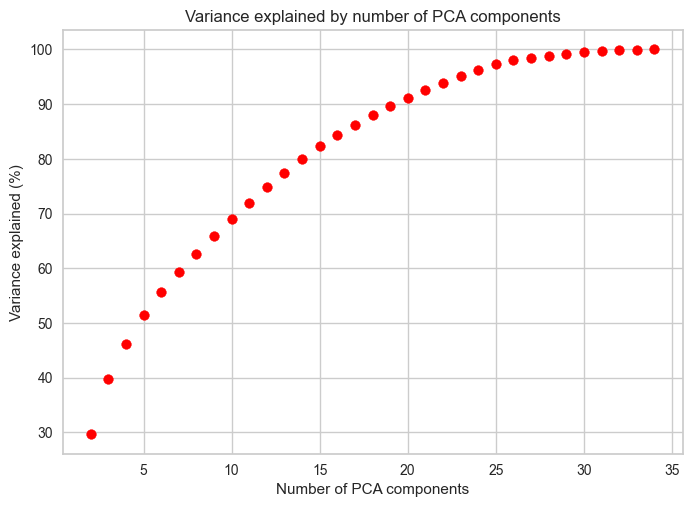

In [100]:
plt.figure()
for n_components in range(2, loans_no_low_correlation_scaled.shape[1]):
    pca_n = PCA(n_components=n_components)
    pca_n.fit_transform(loans_no_low_correlation_scaled)
    plt.scatter([n_components], [pca_n.explained_variance_ratio_.sum()*100], color='red')
plt.title('Variance explained by number of PCA components')
plt.ylabel('Variance explained (%)')
plt.xlabel('Number of PCA components')


So we want around ~90% variance explained, so we'll go with 18 components according to the graph above. In other words, for ~90% of data variance, we can go with 18 PCA features for segmenting the data.

In [101]:
pca_18 = PCA(n_components=18)
predictors_pca_18 = pca_18.fit_transform(loans_no_low_correlation_scaled)
print(f"Explained variance for 18 components: {pca_18.explained_variance_ratio_.sum()*100}%")

Explained variance for 18 components: 88.04012069407189%


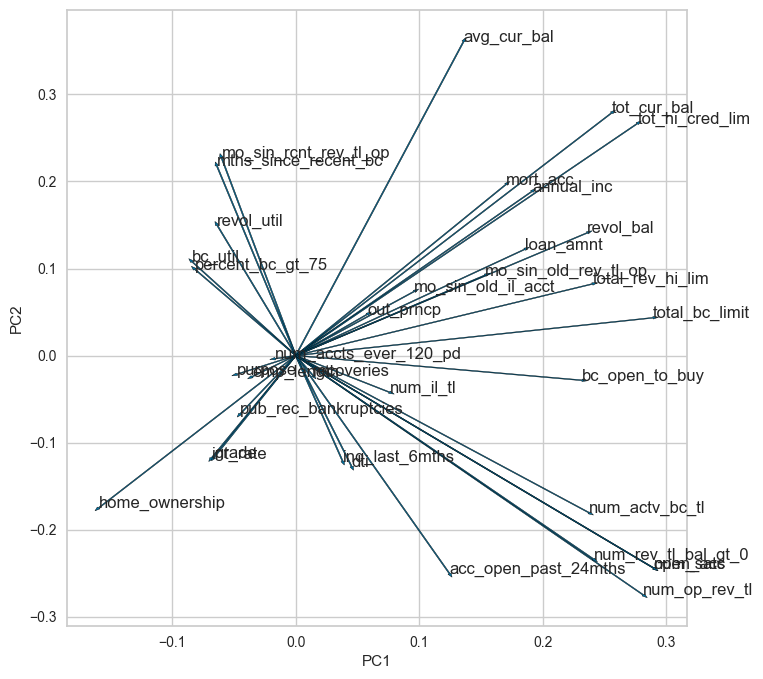

In [102]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
#ax.scatter(pc_data[:,0], pc_data[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pca_18.components_.shape[1]):
    ax.arrow(0, 0, pca_18.components_[i,k], pca_18.components_[j,k])
    ax.text(pca_18.components_[i,k],
            pca_18.components_[j,k],
            loans_no_low_correlation[:-1].columns[k])

In [131]:
relevant_features = [
    "tot_cur_bal",
    "tot_hi_cred_lim",
    "annual_inc",
    "loan_amnt",
    "mo_sin_old_rev_tl_op",
    "bc_open_to_buy",
    "num_actv_bc_tl",
    "open_acc",
    "num_op_rev_tl",
    "acc_open_past_24mths"
]

So, now we're to decide into how many segments we're going to split the data into several clusters. In order to decide best k number, we're going to use the elbow method.

In [104]:
from sklearn.metrics import silhouette_samples, silhouette_score

kmeans_results = []
#silhouette_scores = []

for k in range(2, 18):
    #Compute for kmeans
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(predictors_pca_18)
    kmeans_results.append(kmeans.inertia_)

    #silhoutte score
    #sl = silhouette_score(predictors_pca_18, kmeans.labels_)
    #print(f"Silhouette k={k} result={sl}")
    #silhouette_scores.append(sl)

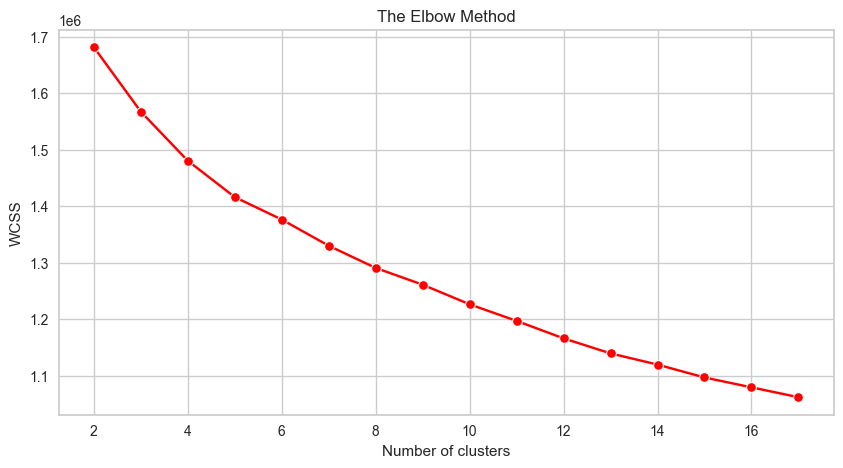

In [105]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(2,18), y=kmeans_results, marker ='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

We can observe through the elbow plot, that the best number of clusters would be 7 clusters.

### Task B

In [124]:
loans_no_low_correlation_labelled = pd.DataFrame(loans_no_low_correlation_scaled.values, columns = loans_no_low_correlation.columns[:-1])
loans_no_low_correlation_labelled

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,purpose,dti,inq_last_6mths,open_acc,...,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_op_rev_tl,num_rev_tl_bal_gt_0,num_sats,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bc_limit
0,1.153379,2.673357,2.354582,-0.826386,-0.949461,0.252022,-0.172430,-0.819293,0.480235,-0.753186,...,0.348883,-0.358143,-0.808470,-0.337644,-0.584488,-0.747651,0.679176,-0.327312,-0.673693,0.002998
1,0.182810,0.534850,0.873972,-1.138469,-0.949461,-0.664145,-0.172430,-0.302632,0.480235,0.524954,...,-0.406796,0.537872,-0.675010,0.985835,0.636149,0.531782,-0.385453,-0.327312,-0.255854,-0.691479
2,-1.320102,1.535853,1.614277,0.734026,1.167700,-0.993965,-0.172430,2.158897,-0.682015,-0.570594,...,-0.406796,0.089864,-0.941929,-0.117065,0.330990,-0.564875,1.388928,-0.327312,-0.748914,-0.792059
3,-1.081871,-0.625403,-0.606638,-0.826386,-0.949461,-0.815862,-0.731269,1.370309,-0.682015,-0.388003,...,-0.406796,-0.806151,-0.541550,-0.337644,-0.279329,-0.747651,1.388928,-0.327312,-0.746937,-0.600479
4,0.565155,-1.307906,-1.346943,-0.514304,-0.949461,4.374770,-0.172430,0.040232,-0.682015,-0.753186,...,-0.406796,-0.806151,0.125750,-1.219964,-1.194807,-0.747651,0.443538,-0.327312,2.086744,-0.107161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62053,1.035734,-1.535406,-1.346943,-0.826386,-0.949461,0.474569,0.386409,-0.348741,0.480235,-0.935777,...,-0.406796,-1.254159,0.259210,-1.219964,-0.889647,-0.930428,-1.450082,-0.327312,0.555879,-0.878270
62054,-0.611292,0.398350,0.133667,-0.514304,1.167700,-0.453426,-0.731269,-0.186767,-0.682015,1.072728,...,-0.406796,0.089864,-0.007710,0.324095,0.330990,1.080111,0.679176,-0.327312,-0.310637,-0.351425
62055,-1.140693,-0.511653,-0.606638,-1.138469,1.167700,0.618488,-0.172430,-1.451818,1.642484,0.159771,...,1.104562,-1.254159,-0.675010,0.544675,-0.279329,0.166230,-1.450082,2.381722,0.285141,-0.983639
62056,1.153379,-0.702754,-0.606638,0.734026,-0.949461,0.893338,-0.172430,-1.094766,0.480235,1.620502,...,-0.406796,0.985880,-0.274630,2.088734,0.941309,1.628440,-1.450082,-0.327312,2.319790,6.684347


In [140]:
KMM7 = KMeans(n_clusters=3)
KMM7.fit(loans_no_low_correlation_labelled)

KMeans(n_clusters=3)

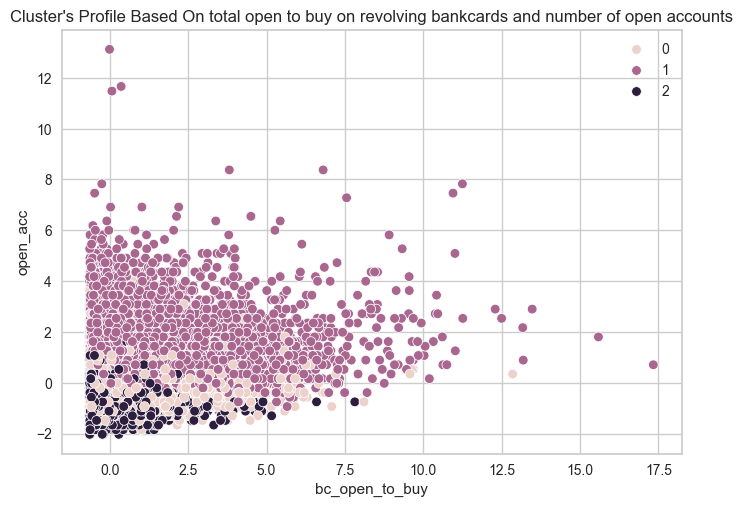

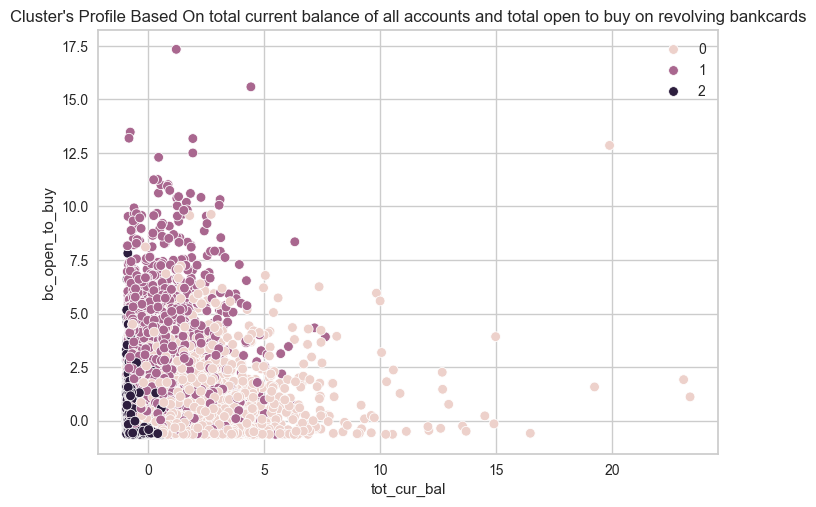

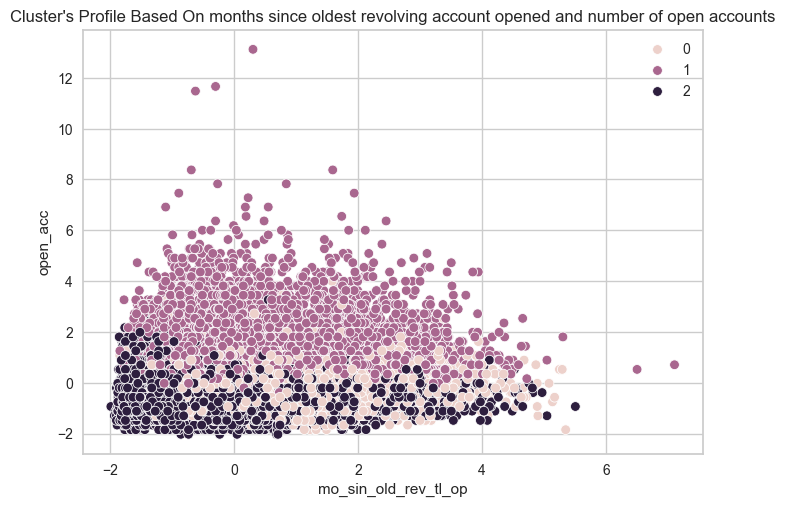

In [141]:
from itertools import combinations
from random import shuffle
 
pl = sns.scatterplot(data = loans_no_low_correlation_labelled,x="bc_open_to_buy", y="open_acc",hue=KMM7.labels_)
pl.set_title("Cluster's Profile Based On total open to buy on revolving bankcards and number of open accounts")
plt.legend()
plt.show()

pl = sns.scatterplot(data = loans_no_low_correlation_labelled,x="tot_cur_bal", y="bc_open_to_buy",hue=KMM7.labels_)
pl.set_title("Cluster's Profile Based On total current balance of all accounts and total open to buy on revolving bankcards")
plt.legend()
plt.show()

pl = sns.scatterplot(data = loans_no_low_correlation_labelled,x="mo_sin_old_rev_tl_op", y="open_acc",hue=KMM7.labels_)
pl.set_title("Cluster's Profile Based On months since oldest revolving account opened and number of open accounts")
plt.legend()
plt.show()

#feature_combos = list(combinations(relevant_features,2))
#shuffle(feature_combos)
 
#for feature1, feature2 in feature_combos:
    #pl = sns.scatterplot(data = loans_no_low_correlation,x=feature1, y=feature2,hue=KMM7.labels_)
    #pl.set_title(f"Cluster based on {feature1} and {feature2}")
    #plt.legend()
    #plt.show()

From the first graph we can see the relationship between "Total open to buy on revolving bankcards" and the "number of open accounts" is typically related to how much credit is available versus how many credit accounts are open.

If you have a high "Total open to buy on revolving bankcards," it means you have a significant amount of credit available on your credit cards. This could suggest that you have a higher overall credit limit, possibly due to a good credit history or a high income, which is clearly visible on our graph as the customers with more open accounts also have access to higher amounts of credit on their bankcards.

A title for this graph would be "Credit Portfolio: Balancing Available Credit and Account Diversity"

On the second graph, the relationship between the "Total current balance of all accounts" and "Total open to buy on revolving bankcards" involves the current outstanding debt versus the available credit on revolving bankcards.

The relationship between these two variables can provide insights into your credit utilization, outstanding debt, and how effectively you manage your available credit on revolving accounts, we can see that people with higher total current balances also have a lower amount of available credit on their accounts, meaning that they are using the credit in their current accounts at a higher level compared to the rest.

This second graph would be named "Credit Utilization Dynamics: Balancing Outstanding Debt and Available Credit"

The ratio between months since oldest revolving account opened and number of open accounts indicates the average age of the open credit lines. Dividing the total months since the oldest revolving account by the number of open accounts gives an average age of these open credit lines. A higher ratio typically suggests that, on average, the open credit accounts are older, which might indicate a longer credit history or more stable credit behavior.

This relationship can be relevant in assessing creditworthiness or understanding an individual's credit management habits. Generally, a longer average age of open credit lines might be viewed positively by lenders, as it may indicate responsible credit behavior and a longer credit history, which could potentially reflect lower credit risk. However, the interpretation of this relationship might also depend on other factors within the broader context of a person's credit report and financial situation.

This graph could be titled "Credit History Maturity: Exploring the Relationship Between Account Longevity and Portfolio Size"


### Task C

In [144]:
loans_no_low_correlation_scaled['cluster'] = KMM7.fit_predict(loans_no_low_correlation_labelled)

In [145]:
loans_no_low_correlation_scaled

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x26,x27,x28,x29,x30,x31,x32,x33,x34,cluster
0,1.153379,2.673357,2.354582,-0.826386,-0.949461,0.252022,-0.172430,-0.819293,0.480235,-0.753186,...,-0.358143,-0.808470,-0.337644,-0.584488,-0.747651,0.679176,-0.327312,-0.673693,0.002998,1
1,0.182810,0.534850,0.873972,-1.138469,-0.949461,-0.664145,-0.172430,-0.302632,0.480235,0.524954,...,0.537872,-0.675010,0.985835,0.636149,0.531782,-0.385453,-0.327312,-0.255854,-0.691479,1
2,-1.320102,1.535853,1.614277,0.734026,1.167700,-0.993965,-0.172430,2.158897,-0.682015,-0.570594,...,0.089864,-0.941929,-0.117065,0.330990,-0.564875,1.388928,-0.327312,-0.748914,-0.792059,1
3,-1.081871,-0.625403,-0.606638,-0.826386,-0.949461,-0.815862,-0.731269,1.370309,-0.682015,-0.388003,...,-0.806151,-0.541550,-0.337644,-0.279329,-0.747651,1.388928,-0.327312,-0.746937,-0.600479,1
4,0.565155,-1.307906,-1.346943,-0.514304,-0.949461,4.374770,-0.172430,0.040232,-0.682015,-0.753186,...,-0.806151,0.125750,-1.219964,-1.194807,-0.747651,0.443538,-0.327312,2.086744,-0.107161,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62053,1.035734,-1.535406,-1.346943,-0.826386,-0.949461,0.474569,0.386409,-0.348741,0.480235,-0.935777,...,-1.254159,0.259210,-1.219964,-0.889647,-0.930428,-1.450082,-0.327312,0.555879,-0.878270,2
62054,-0.611292,0.398350,0.133667,-0.514304,1.167700,-0.453426,-0.731269,-0.186767,-0.682015,1.072728,...,0.089864,-0.007710,0.324095,0.330990,1.080111,0.679176,-0.327312,-0.310637,-0.351425,1
62055,-1.140693,-0.511653,-0.606638,-1.138469,1.167700,0.618488,-0.172430,-1.451818,1.642484,0.159771,...,-1.254159,-0.675010,0.544675,-0.279329,0.166230,-1.450082,2.381722,0.285141,-0.983639,1
62056,1.153379,-0.702754,-0.606638,0.734026,-0.949461,0.893338,-0.172430,-1.094766,0.480235,1.620502,...,0.985880,-0.274630,2.088734,0.941309,1.628440,-1.450082,-0.327312,2.319790,6.684347,0


In [148]:
X = pd.get_dummies(loans_no_low_correlation_scaled['cluster'], prefix='cluster')
y = target_no_low_correlation

X_train_segm, X_test_segm, y_train_segm, y_test_segm = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_segm, y_train_segm)

GaussianNB()

In [151]:
y_pred_segm = naive_bayes_model.predict(X_test_segm)
accuracy = accuracy_score(y_test_segm, y_pred_segm)

print(f"Naive Bayes Model Accuracy: {accuracy*100}")

Naive Bayes Model Accuracy: 83.79793747985819


In our case using the Naive Bayes model, it doesnt improve the model as the accuracy is lower. In summary, assigning cluster labels directly to the target variable to increase accuracy is not a good idea. It may lead to overfitting, may generalize too much our data.